In [8]:
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#ignore warnigns
import warnings
warnings.filterwarnings('ignore')

In [9]:
import os
os.chdir(r'C:\Users\Nikita\Documents\data')
os.listdir()

['sample_submission.csv', 'test.csv', 'train.csv']

In [10]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv' )

In [11]:
train.shape , test.shape

((1460, 81), (1459, 80))

In [12]:

sample = pd.read_csv('sample_submission.csv')
sample.head()    

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977

In [13]:
# mergeing sample data with test data on basis of id
test = test.merge(sample,on='Id')
test.shape

(1459, 81)

In [14]:
train.shape , test.shape

((1460, 81), (1459, 81))

In [15]:
# concatinating both the data of test and train together 
frames = [train, test]
df = pd.concat(frames)
display(df)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1454         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition      SalePrice  
0         2   2008        WD         Normal  208500.000000  
1         5   2007        WD         Normal  181500.000000  
2         9   2008        WD         Normal  223500.000000  
3         2   2006        WD        Abnorml  140000.000000  
4        12   2008        WD         Normal  250000.000000  
...     ...    ...       ...            ...            ...  
1454      6   2006        WD         Normal  167081.220949  
1455      4   2006        WD        Abnorml  164788.778231  
1456      9   2006        WD        Abnorml  219222.423400  
1457      7   2006        WD         Normal  184924.279659  
1458     11   2006        WD         Normal  187741.866657  

[2919 rows x 81 columns]

In [16]:
df.drop(['Id'],axis=1,inplace=True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          60       RL         65.0     8450   Pave   NaN      Reg   
1          20       RL         80.0     9600   Pave   NaN      Reg   
2          60       RL         68.0    11250   Pave   NaN      IR1   
3          70       RL         60.0     9550   Pave   NaN      IR1   
4          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
1         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
3         Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
4         Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal   208500.0  
1       0      5    2007        WD         Normal   181500.0  
2       0      9    2008        WD         Normal   223500.0  
3       0      2    2006        WD        Abnorml   140000.0  
4       0     12    2008        WD         Normal   250000.0  

[5 rows x 80 columns]

In [17]:
train.drop(['Id'],axis=1,inplace=True)
test.drop(['Id'],axis=1,inplace=True)

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [19]:
df.describe(include=['O']).T

count unique      top  freq
MSZoning       2915      5       RL  2265
Street         2919      2     Pave  2907
Alley           198      2     Grvl   120
LotShape       2919      4      Reg  1859
LandContour    2919      4      Lvl  2622
Utilities      2917      2   AllPub  2916
LotConfig      2919      5   Inside  2133
LandSlope      2919      3      Gtl  2778
Neighborhood   2919     25    NAmes   443
Condition1     2919      9     Norm  2511
Condition2     2919      8     Norm  2889
BldgType       2919      5     1Fam  2425
HouseStyle     2919      8   1Story  1471
RoofStyle      2919      6    Gable  2310
RoofMatl       2919      8  CompShg  2876
Exterior1st    2918     15  VinylSd  1025
Exterior2nd    2918     16  VinylSd  1014
MasVnrType     2895      4     None  1742
ExterQual      2919      4       TA  1798
ExterCond      2919      5       TA  2538
Foundation     2919      6    PConc  1308
BsmtQual       2838      4       TA  1283
BsmtCond       2837      4       TA  2606
BsmtExposure   2837      4       No  1904
BsmtFinType1   2840      6      Unf   851
BsmtFinType2   2839      6      Unf  2493
Heating        2919      6     GasA  2874
HeatingQC      2919      5       Ex  1493
CentralAir     2919      2        Y  2723
Electrical     2918      5    SBrkr  2671
KitchenQual    2918      4       TA  1492
Functional     2917      7      Typ  2717
FireplaceQu    1499      5       Gd   744
GarageType     2762      6   Attchd  1723
GarageFinish   2760      3      Unf  1230
GarageQual     2760      5       TA  2604
GarageCond     2760      5       TA  2654
PavedDrive     2919      3        Y  2641
PoolQC           10      3       Ex     4
Fence           571      4    MnPrv   329
MiscFeature     105      4     Shed    95
SaleType       2918      9       WD  2525
SaleCondition  2919      6   Normal  2402

# finding NAN values 

In [20]:
def missingValues(df):
    m=df.isnull().sum()
    md=(df.isnull().sum()/ df.shape[0]*100)
    data=pd.concat([m, md], axis=1, keys=["Missing", "Percentage"])
    fg=data.sort_values(by ="Percentage", ascending=False)
    fg1=fg[fg["Percentage"]>0]
    return fg1

missingValues(df)   

Missing  Percentage
PoolQC           2909   99.657417
MiscFeature      2814   96.402878
Alley            2721   93.216855
Fence            2348   80.438506
FireplaceQu      1420   48.646797
LotFrontage       486   16.649538
GarageCond        159    5.447071
GarageQual        159    5.447071
GarageYrBlt       159    5.447071
GarageFinish      159    5.447071
GarageType        157    5.378554
BsmtCond           82    2.809181
BsmtExposure       82    2.809181
BsmtQual           81    2.774923
BsmtFinType2       80    2.740665
BsmtFinType1       79    2.706406
MasVnrType         24    0.822199
MasVnrArea         23    0.787941
MSZoning            4    0.137033
BsmtHalfBath        2    0.068517
Functional          2    0.068517
BsmtFullBath        2    0.068517
Utilities           2    0.068517
BsmtUnfSF           1    0.034258
KitchenQual         1    0.034258
BsmtFinSF1          1    0.034258
SaleType            1    0.034258
GarageCars          1    0.034258
GarageArea          1    0.034258
TotalBsmtSF         1    0.034258
Exterior2nd         1    0.034258
Exterior1st         1    0.034258
Electrical          1    0.034258
BsmtFinSF2          1    0.034258

#### We are segerating the data on basis of catagorical and numerical and as  PoolQC ,MiscFeature ,Alley &	Fence has >48%  of Nan values so we are  drooping that values. 

In [21]:
df.drop(["PoolQC" ,"MiscFeature", "Alley", "Fence"],axis=1,inplace=True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL         65.0     8450   Pave      Reg         Lvl   
1          20       RL         80.0     9600   Pave      Reg         Lvl   
2          60       RL         68.0    11250   Pave      IR1         Lvl   
3          70       RL         60.0     9550   Pave      IR1         Lvl   
4          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0    AllPub    Inside       Gtl  ...             0         0           0   
1    AllPub       FR2       Gtl  ...             0         0           0   
2    AllPub    Inside       Gtl  ...             0         0           0   
3    AllPub    Corner       Gtl  ...           272         0           0   
4    AllPub       FR2       Gtl  ...             0         0           0   

  PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0        0       0       2    2008        WD         Normal  208500.0  
1        0       0       5    2007        WD         Normal  181500.0  
2        0       0       9    2008        WD         Normal  223500.0  
3        0       0       2    2006        WD        Abnorml  140000.0  
4        0       0      12    2008        WD         Normal  250000.0  

[5 rows x 76 columns]

#### Since we have a lot of small no of missing values in various columns we can use simple imputer and if column is catagorical we can repalce with mode and if it is numerical we can replace it with median.

In [22]:
catagorical_nan = ['MasVnrType', 'MSZoning','BsmtHalfBath','Functional','BsmtFullBath','Utilities','Electrical','KitchenQual','SaleType','GarageCars','Exterior2nd','Exterior1st','FireplaceQu','GarageCond','GarageQual','GarageFinish','GarageType','BsmtCond','BsmtExposure','BsmtQual','BsmtFinType2','BsmtFinType1']
numerical_nan = ['MasVnrArea','BsmtUnfSF','BsmtFinSF1','TotalBsmtSF','BsmtFinSF2','LotFrontage']


In [23]:
df[catagorical_nan] = np.where(df[catagorical_nan].isna(), df[catagorical_nan].mode(), df[catagorical_nan])

In [24]:
df[numerical_nan] = np.where(df[numerical_nan].isna(), df[numerical_nan].median(), df[numerical_nan])

### here the data is segregated into categorical and numerical basis for performing EDA

In [25]:
df_num= df[['LotFrontage','GarageArea','TotalBsmtSF','1stFlrSF','LowQualFinSF','GrLivArea','PoolArea','MiscVal']]

In [26]:
df_cat = df[['MSSubClass','MSZoning','LotShape','Neighborhood','HouseStyle','MasVnrType','OverallQual','OverallCond',
             'Exterior1st','Exterior2nd','ExterQual','Foundation','BsmtExposure','BsmtFinType1','HeatingQC'
             ,'FullBath','HalfBath','KitchenQual','FireplaceQu','Fireplaces','GarageFinish','GarageCars']]

#### Here i have kept which are non biased 

# Univariate Analysis 

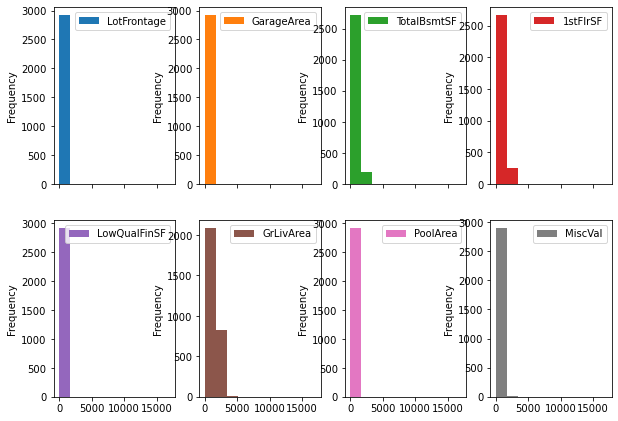

In [27]:
df_num.plot(kind="hist",subplots=True,layout=(4,4),figsize=(10,15))
plt.show()

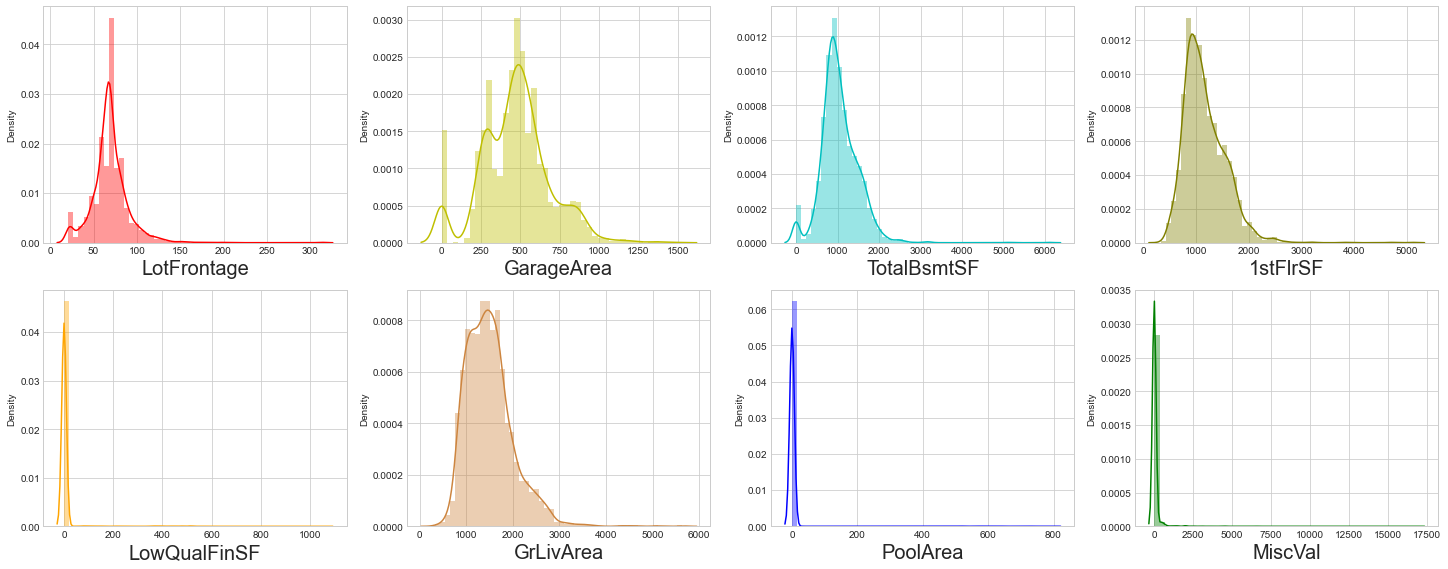

In [28]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(25,20))
col=["r","y","c","olive","orange","peru","b","g"]
plotnumber=1
j=0
for i in df_num:
    if plotnumber<=8:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df_num[i],color=col[j])
        plt.xlabel(i,fontsize=20)
        plotnumber+=1
        j+=1


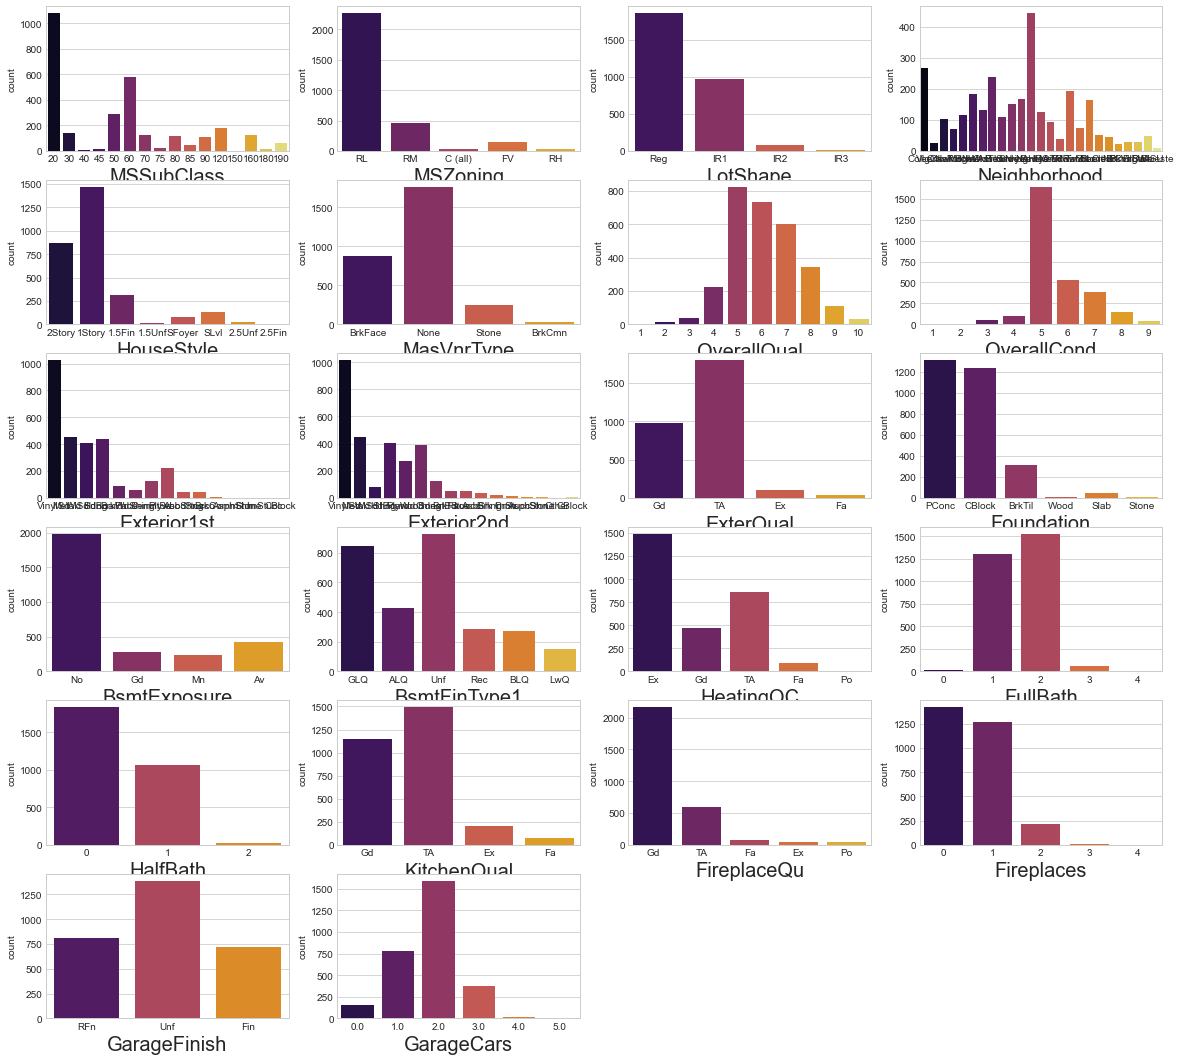

In [29]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df_cat:
    if plotnumber<=22:
        ax=plt.subplot(8,4,plotnumber)
        sns.countplot(df_cat[i],palette="inferno")
        plt.xlabel(i,fontsize=20)
        plotnumber+=1


# Bivariate Analysis

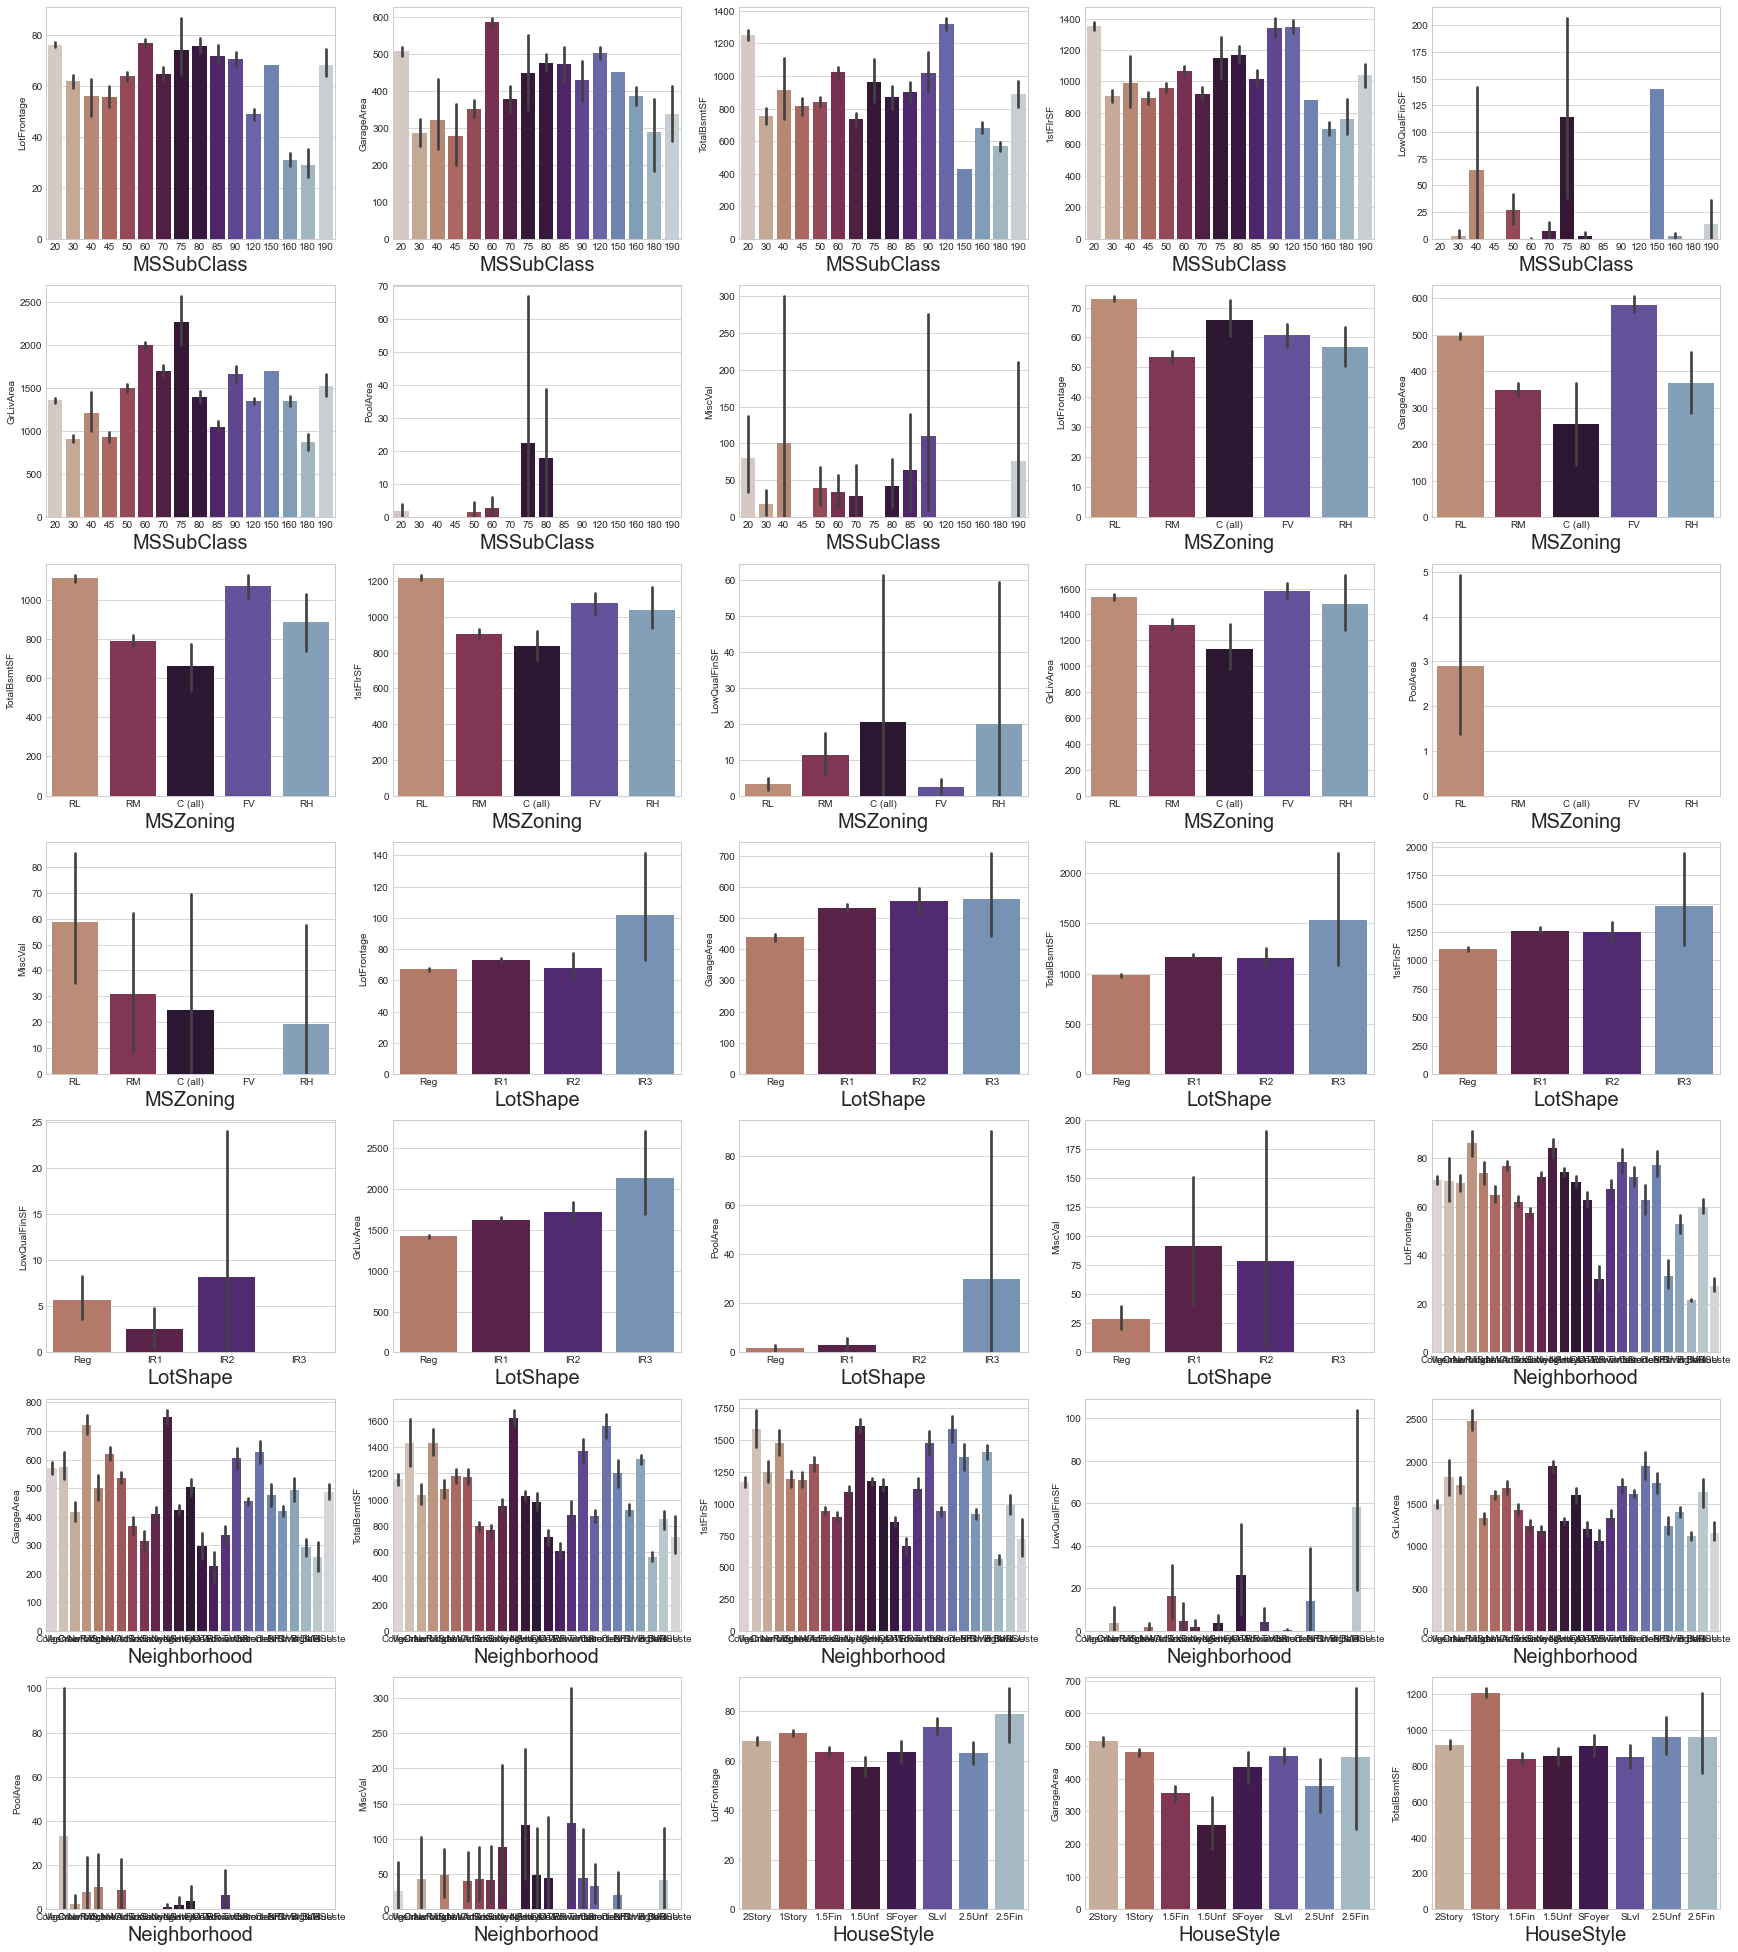

In [30]:
plt.figure(figsize=(30,35))
plotnumber=1
for i in df_cat:
    for j in df_num:
        if plotnumber<=35:
            ax=plt.subplot(7,5,plotnumber)
            sns.barplot(df_cat[i],df_num[j],palette="twilight_r")
            plt.xlabel(i,fontsize=20)
            plotnumber+=1

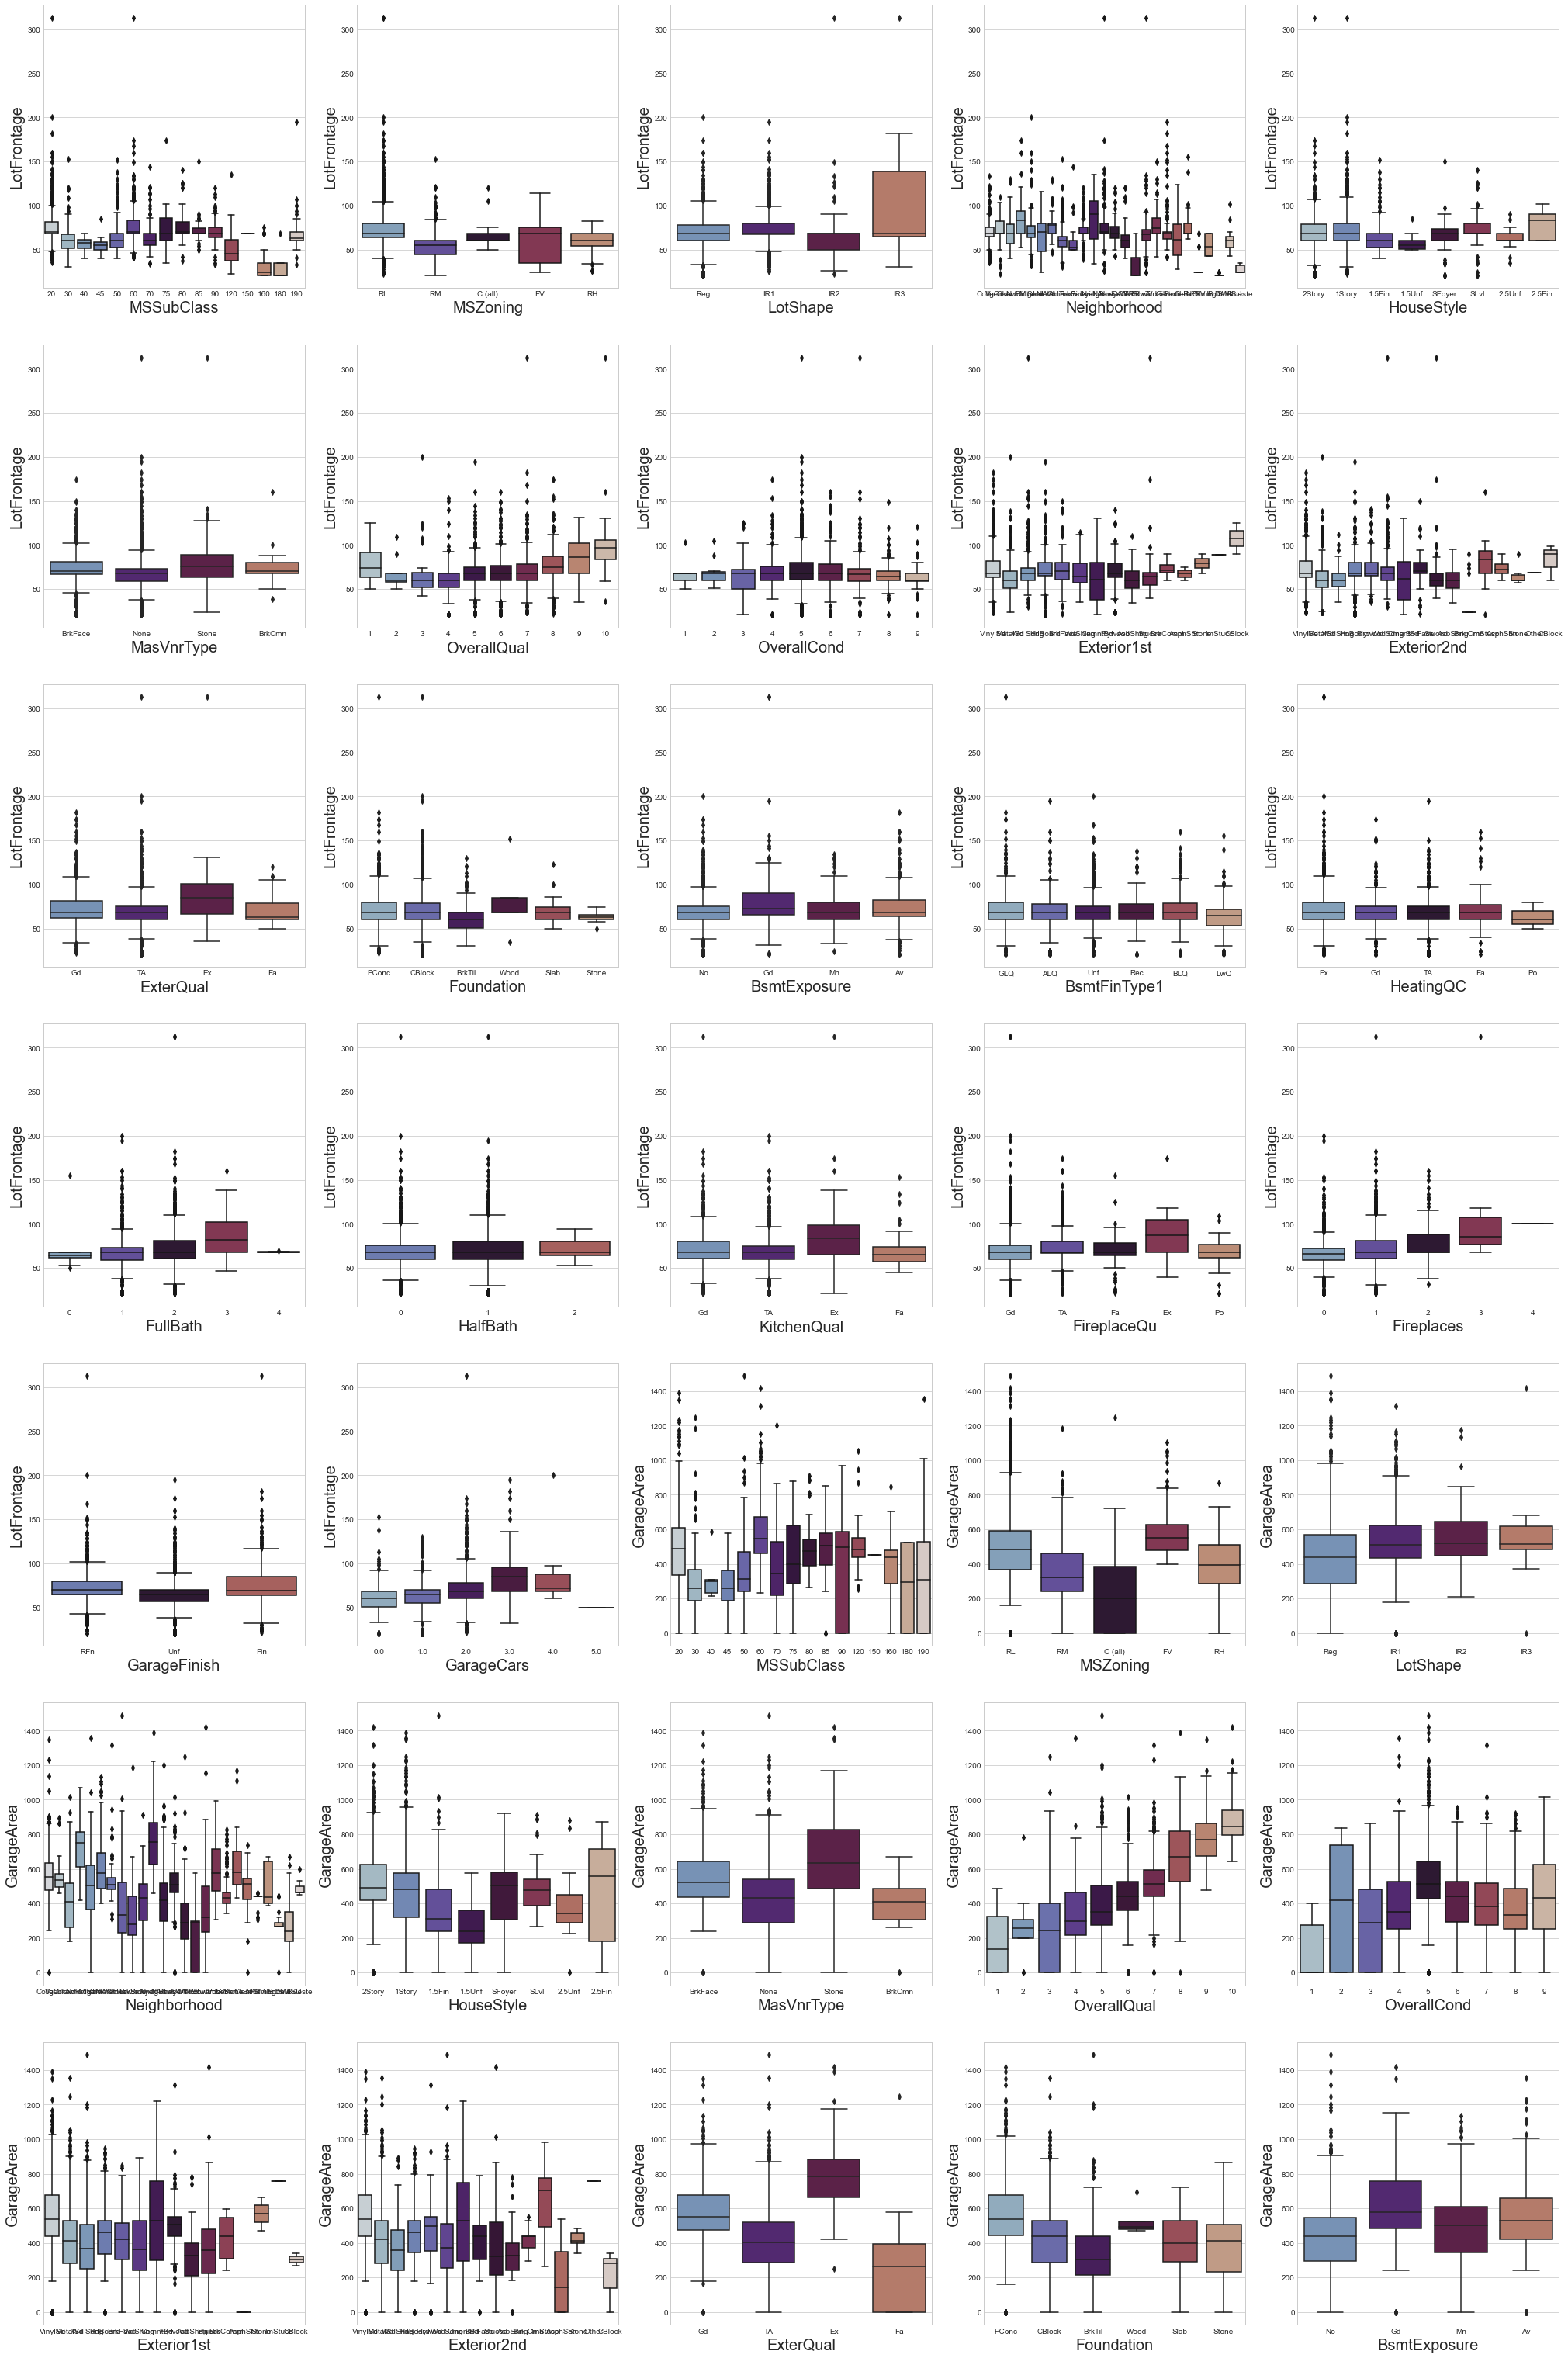

In [31]:
plt.figure(figsize=(35,55))
plotnumber=1
for i in df_num:
    for j in df_cat: 
        if plotnumber<=35:
            ax=plt.subplot(7,5,plotnumber)
            sns.boxplot(y=df_num[i],x=df_cat[j],palette="twilight")
            plt.xlabel(j,fontsize=20)
            plt.ylabel(i,fontsize=20)
            plotnumber+=1

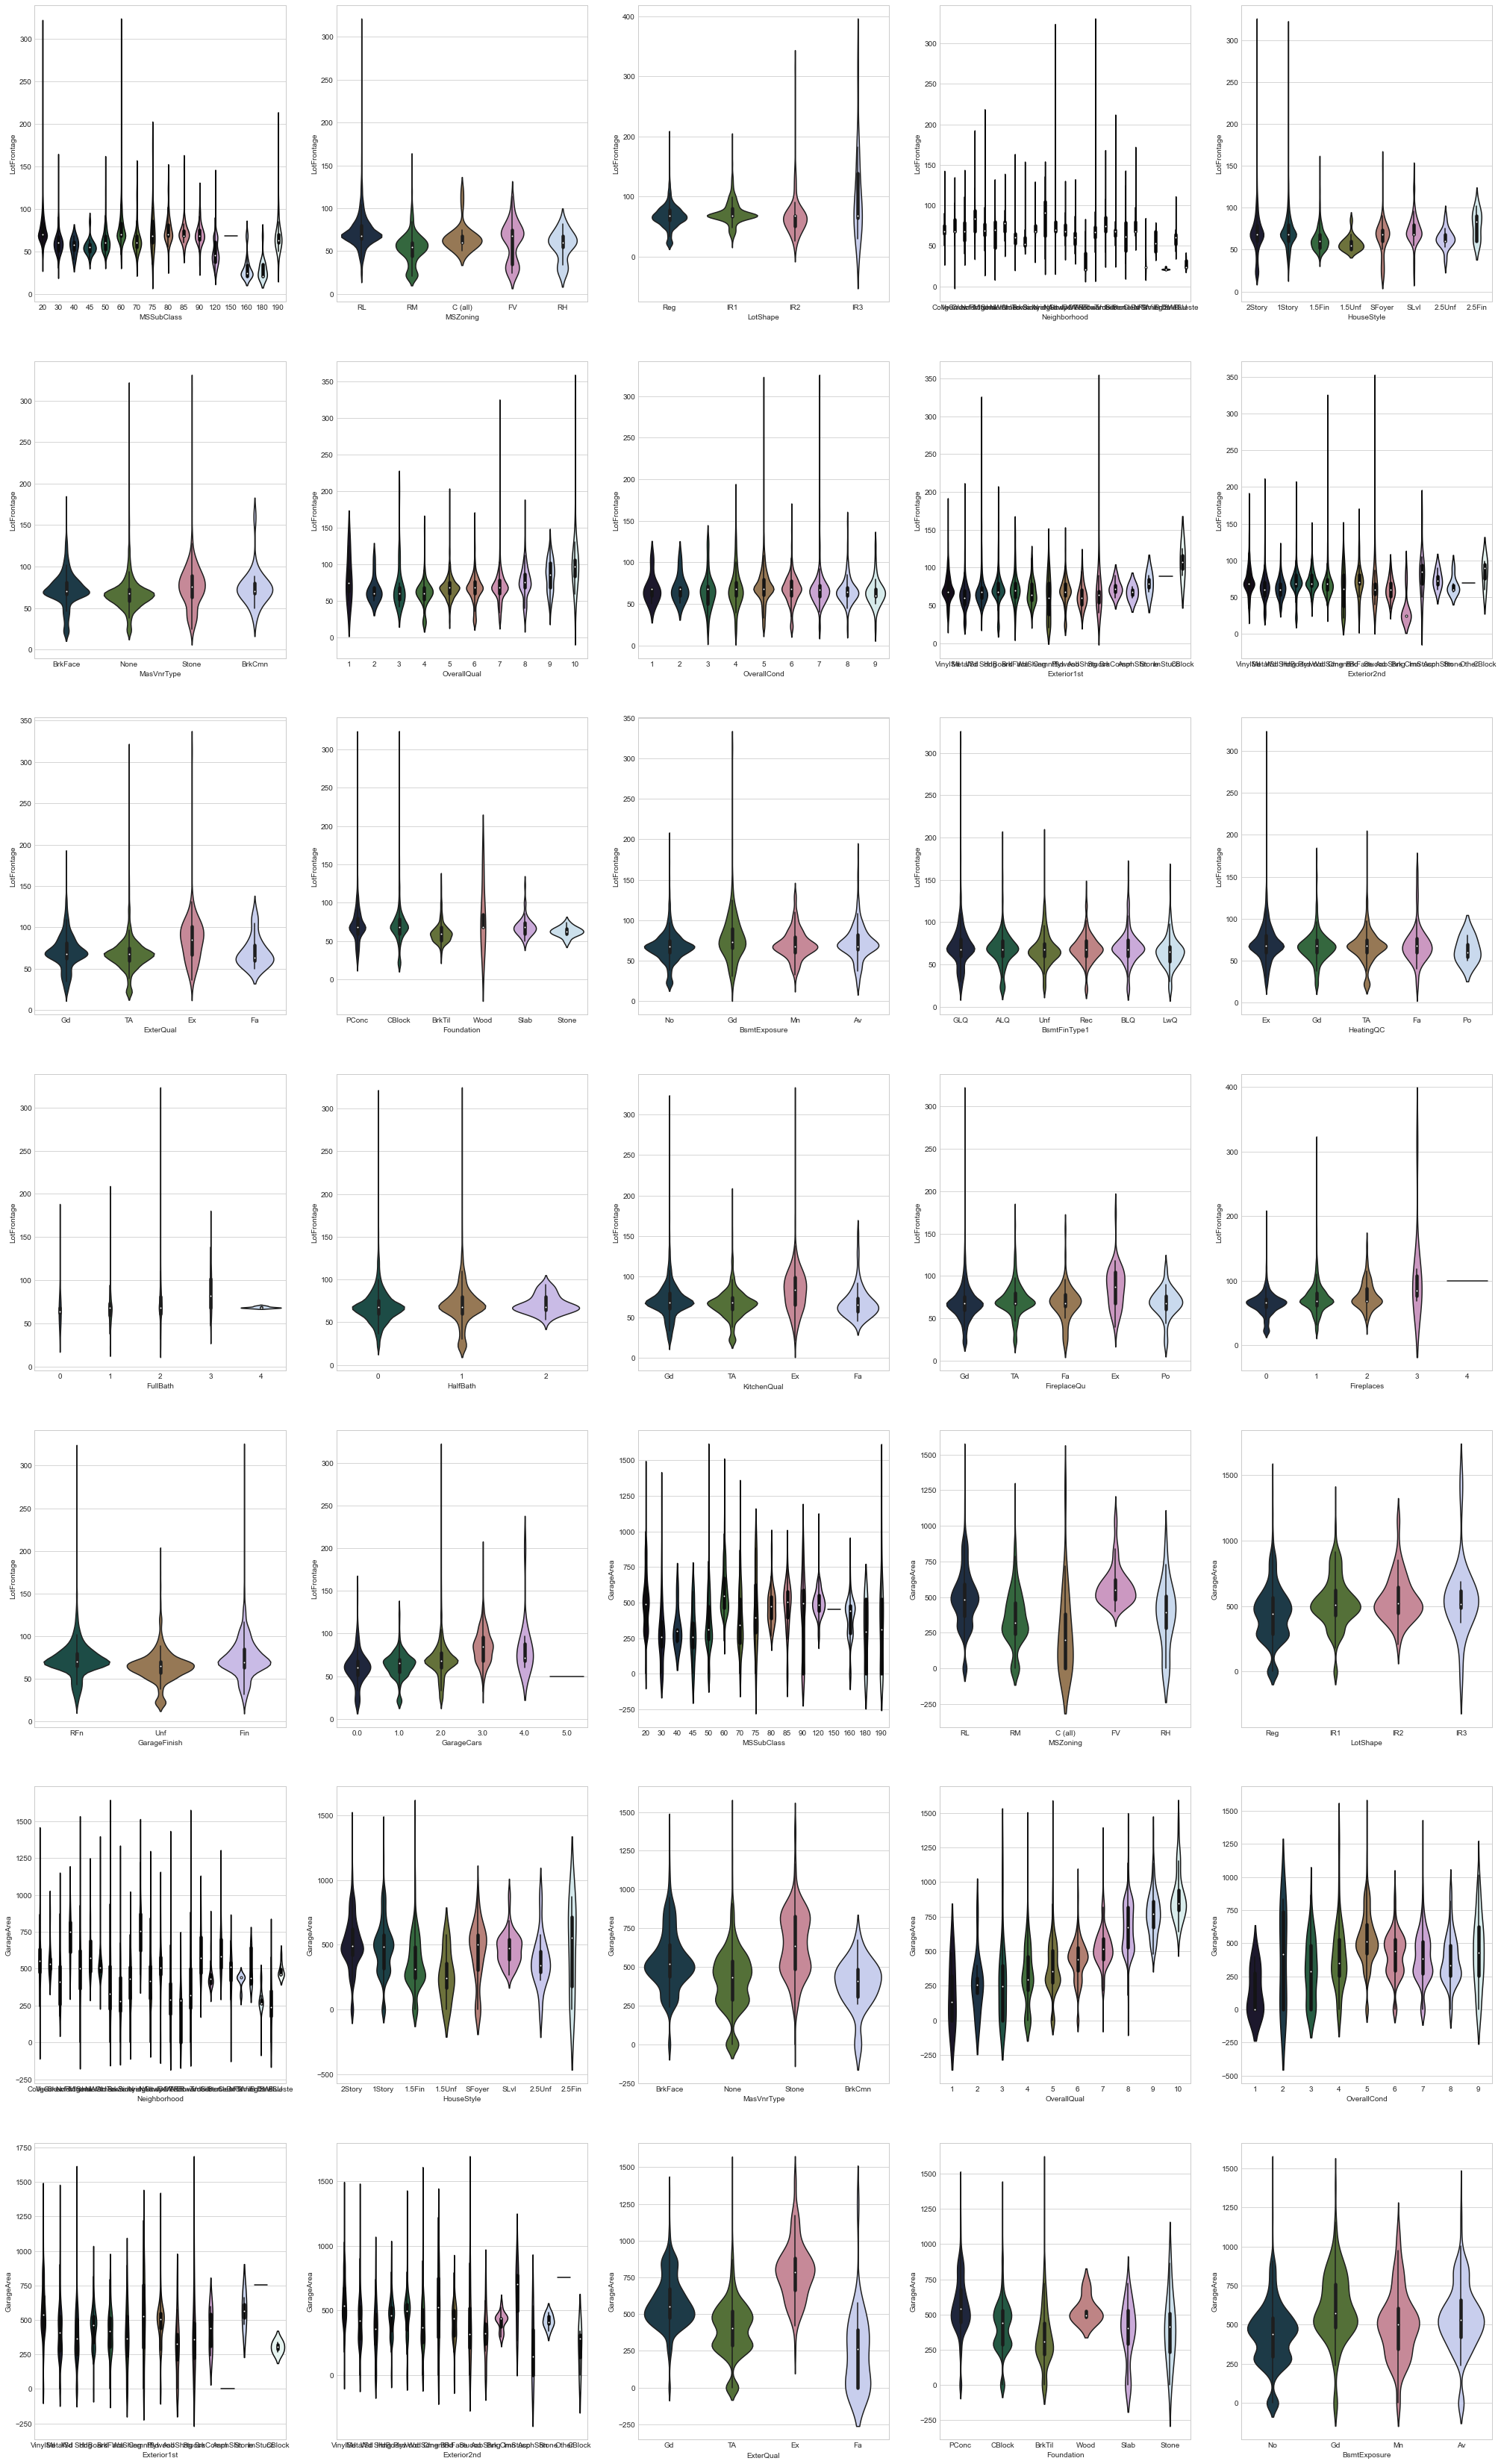

In [32]:
plt.figure(figsize=(35,60))
plotnumber=1
for i in df_num:
    for j in df_cat: 
        if plotnumber<=35:
            ax=plt.subplot(7,5,plotnumber)
            sns.violinplot(y=df_num[i],x=df_cat[j],palette="cubehelix")
            plt.xlabel(j)
            plt.ylabel(i)
            plotnumber+=1

<AxesSubplot:>

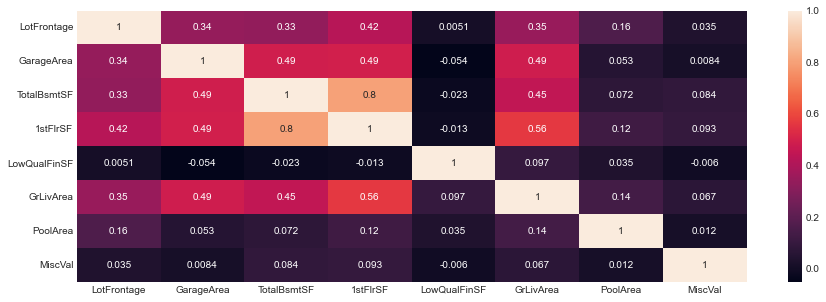

In [33]:
plt.figure(figsize=(15,5), facecolor='white')
sns.heatmap(df_num.corr(),annot=True)

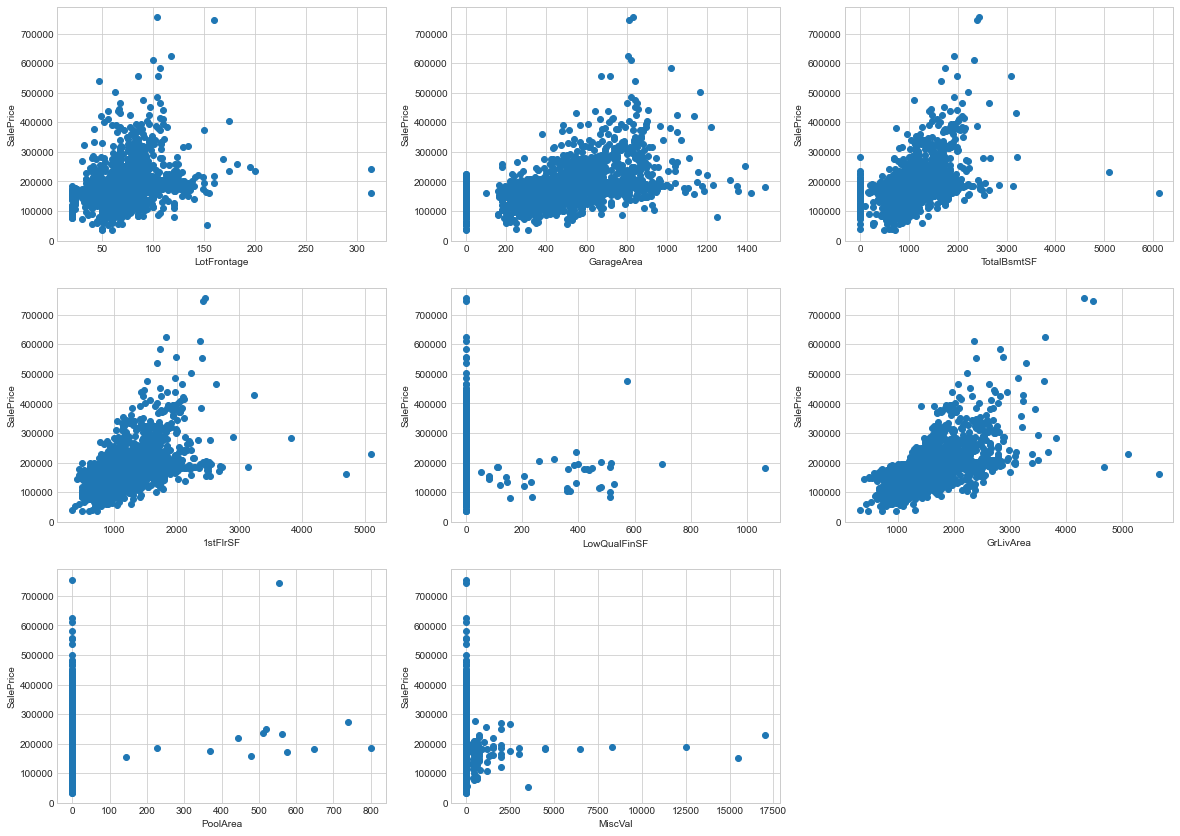

In [34]:
plt.figure(figsize=(20,25))
plotnumber=1
for i in df_num.columns:
    if plotnumber<=15:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(y=df["SalePrice"],x=df_num[i])
        plt.xlabel(i)
        plt.ylabel("SalePrice")
        plotnumber+=1

# Mapping 

In [35]:

df['FireplaceQu'].unique() , df['FireplaceQu'].value_counts()

(array(['Gd', 'TA', 'Fa', 'Ex', 'Po'], dtype=object),
 Gd    2164
 TA     592
 Fa      74
 Po      46
 Ex      43
 Name: FireplaceQu, dtype: int64)

In [36]:
df['FireplaceQu'] = df['FireplaceQu'].map({'Ex':4,
                                           'Gd':3,
                                           'TA':2,
                                           'Fa':1,
                                           'Po':1})

df['FireplaceQu'].fillna(value=0 , inplace=True , downcast='int')
df['FireplaceQu'].unique()

array([3, 2, 1, 4], dtype=int64)

In [37]:
df['LotFrontage'].min(), df['LotFrontage'].max() , df['LotFrontage'].value_counts(ascending=False ,sort=True)

(21.0,
 313.0,
 68.0     530
 60.0     276
 80.0     137
 70.0     133
 50.0     117
         ... 
 152.0      1
 138.0      1
 182.0      1
 168.0      1
 133.0      1
 Name: LotFrontage, Length: 128, dtype: int64)

In [38]:
df['LotFrontage'].mean() , df['LotFrontage'].median()

(69.08838643371017, 68.0)

In [39]:
# outliar treatment
df['LotFrontage'] = np.where(df['LotFrontage']>200 , df['LotFrontage'].median() ,df['LotFrontage'])

#filling nan Values 
df['LotFrontage'].fillna(value= 68, inplace=True , downcast='int')

In [40]:
# lets check 
df['LotFrontage'].isna().sum()

0

In [41]:
missingValues(df).head().index

Index(['GarageYrBlt', 'GarageArea'], dtype='object')

In [42]:
df[['GarageType','GarageYrBlt', 'GarageFinish','GarageArea', 'GarageQual','GarageCars','GarageCond']]

GarageType  GarageYrBlt GarageFinish  GarageArea GarageQual GarageCars  \
0        Attchd       2003.0          RFn       548.0         TA        2.0   
1        Attchd       1976.0          RFn       460.0         TA        2.0   
2        Attchd       2001.0          RFn       608.0         TA        2.0   
3        Detchd       1998.0          Unf       642.0         TA        3.0   
4        Attchd       2000.0          RFn       836.0         TA        3.0   
...         ...          ...          ...         ...        ...        ...   
1454     Attchd          NaN          Unf         0.0         TA        0.0   
1455    CarPort       1970.0          Unf       286.0         TA        1.0   
1456     Detchd       1960.0          Unf       576.0         TA        2.0   
1457     Attchd          NaN          Unf         0.0         TA        0.0   
1458     Attchd       1993.0          Fin       650.0         TA        3.0   

     GarageCond  
0            TA  
1            TA  
2            TA  
3            TA  
4            TA  
...         ...  
1454         TA  
1455         TA  
1456         TA  
1457         TA  
1458         TA  

[2919 rows x 7 columns]

In [43]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'Basment', '2Types'],
      dtype=object)

In [44]:
df['GarageType'].value_counts()

Attchd     1880
Detchd      779
BuiltIn     186
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [45]:
df['GarageType'] = df['GarageType'].map({'Attchd':3,
                                        'Detchd':2,
                                        'BuiltIn':1,
                                        'Basment':0,
                                        '2Types' : 4,
                                        'CarPort':0 })

df['GarageType'].fillna(value=0 , inplace=True , downcast='int')
df['GarageType'].unique()

array([3, 2, 1, 0, 4], dtype=int64)

In [46]:
df['GarageYrBlt'].unique()

array([2003., 1976., 2001., 1998., 2000., 1993., 2004., 1973., 1931.,
       1939., 1965., 2005., 1962., 2006., 1960., 1991., 1970., 1967.,
       1958., 1930., 2002., 1968., 2007., 2008., 1957., 1920., 1966.,
       1959., 1995., 1954., 1953.,   nan, 1983., 1977., 1997., 1985.,
       1963., 1981., 1964., 1999., 1935., 1990., 1945., 1987., 1989.,
       1915., 1956., 1948., 1974., 2009., 1950., 1961., 1921., 1900.,
       1979., 1951., 1969., 1936., 1975., 1971., 1923., 1984., 1926.,
       1955., 1986., 1988., 1916., 1932., 1972., 1918., 1980., 1924.,
       1996., 1940., 1949., 1994., 1910., 1978., 1982., 1992., 1925.,
       1941., 2010., 1927., 1947., 1937., 1942., 1938., 1952., 1928.,
       1922., 1934., 1906., 1914., 1946., 1908., 1929., 1933., 1917.,
       1896., 1895., 2207., 1943., 1919.])

In [47]:
# making new column with today year
df['Today_year'] = 2022

# making years Old column and drop GarageYrBlt column along with 2022 coluimn 
df['YearOld']  = df['Today_year'] -df['GarageYrBlt']
df.drop(['Today_year'], axis=1,inplace=True)


In [48]:
df['YearOld'].value_counts(sort=True).head()

17.0    142
16.0    115
15.0    115
18.0     99
19.0     92
Name: YearOld, dtype: int64

In [49]:
##Calculated year old i.e how old the house has been 
#any value <10 as 3
# any value <20 as 2
# any value 20-50 as 1 
# any value >50 as 0

df['YearOld'] = np.where(df['YearOld']>50 , 0 ,df['YearOld'])
df['YearOld'] = np.where( (df['YearOld']<=51) & (df['YearOld']>20)  , 1 ,df['YearOld'])
df['YearOld'] = np.where((df['YearOld']<21) & (df['YearOld']>10)  , 2 ,df['YearOld'])

df['YearOld'].fillna(value=0 , inplace=True , downcast='int')
df['YearOld'].unique()


array([   2,    1,    0, -185])

In [50]:
# negative value is not possible so
df[df['YearOld']==-185][['YearOld','GarageYrBlt']]

YearOld  GarageYrBlt
1132     -185       2207.0

In [51]:
# well this value is clearly an typing error so. lets replce it with 1
df['YearOld'] = np.where(df['YearOld']==-185 , 1 ,df['YearOld'])

In [52]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0          60       RL           65     8450   Pave      Reg         Lvl   
1          20       RL           80     9600   Pave      Reg         Lvl   
2          60       RL           68    11250   Pave      IR1         Lvl   
3          70       RL           60     9550   Pave      IR1         Lvl   
4          60       RL           84    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope  ... 3SsnPorch ScreenPorch PoolArea MiscVal  \
0    AllPub    Inside       Gtl  ...         0           0        0       0   
1    AllPub       FR2       Gtl  ...         0           0        0       0   
2    AllPub    Inside       Gtl  ...         0           0        0       0   
3    AllPub    Corner       Gtl  ...         0           0        0       0   
4    AllPub       FR2       Gtl  ...         0           0        0       0   

  MoSold  YrSold  SaleType  SaleCondition  SalePrice YearOld  
0      2    2008        WD         Normal   208500.0       2  
1      5    2007        WD         Normal   181500.0       1  
2      9    2008        WD         Normal   223500.0       1  
3      2    2006        WD        Abnorml   140000.0       1  
4     12    2008        WD         Normal   250000.0       1  

[5 rows x 76 columns]

In [53]:
df['YearOld'].unique()

array([2, 1, 0])

In [54]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin'], dtype=object)

In [55]:
df['GarageFinish'] = df['GarageFinish'].map({'Fin':3,
                                             'RFn':2,
                                             'Unf':1})

df['GarageFinish'].fillna(value=0 , inplace=True , downcast='int')
df['GarageFinish'].unique()

array([2, 1, 3], dtype=int64)

In [56]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [57]:
df['GarageQual'] = df['GarageQual'].map({'Ex':4,
                                         'Gd':3,
                                         'TA':2,
                                         'Fa':2,
                                          'Po':1})

df['GarageQual'].fillna(value=0 , inplace=True , downcast='int')
df['GarageQual'].unique()

array([2, 3, 4, 1], dtype=int64)

In [58]:
df['GarageCond'].unique() , df['GarageCond'].isna().sum()

(array(['TA', 'Fa', 'Gd', 'Po', 'Ex'], dtype=object), 0)

In [59]:
df['GarageCond'] = df['GarageCond'].map({'Ex':4,
                                         'Gd':3,
                                         'TA':2,
                                         'Fa':2,
                                          'Po':1})
df['GarageCond'].fillna(value=0 , inplace=True , downcast='int')
df['GarageCond'].unique()

array([2, 3, 1, 4], dtype=int64)

In [60]:
missingValues(df)

Missing  Percentage
GarageArea        1    0.034258

In [61]:
df['BsmtCond'].unique() , df['BsmtExposure'].unique() , df['BsmtQual'].unique() , df['BsmtFinType2'].unique() ,df['BsmtFinType1'].unique()

(array(['TA', 'Gd', 'Fa', 'Po'], dtype=object),
 array(['No', 'Gd', 'Mn', 'Av'], dtype=object),
 array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object),
 array(['Unf', 'BLQ', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object),
 array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'LwQ'], dtype=object))

In [62]:
dict_base_basement_condition = {'Gd': 3, 'TA': 2, 'Fa': 2, 'Po':1}
# mapping values in column from dictionary

df['BsmtCond'] = df['BsmtCond'].map(dict_base_basement_condition)
df['BsmtCond'].fillna(value=0 , inplace=True , downcast='int')
df['BsmtCond'].unique()

array([2, 3, 1], dtype=int64)

In [63]:
dict_base_expo= {'Gd': 2, 'Av':1, 'Mn': 1, 'no':0}
# mapping values in column from dictionary

df['BsmtExposure'] = df['BsmtExposure'].map(dict_base_expo)
df['BsmtExposure'].fillna(value=0 , inplace=True , downcast='int')
df['BsmtExposure'].unique()

array([0, 2, 1])

In [64]:
dict_base_basement_Qtl = {'Gd': 2, 'TA': 2, 'Fa': 1, 'Ex':3}
# mapping values in column from dictionary

df['BsmtQual'] = df['BsmtQual'].map(dict_base_basement_Qtl)
df['BsmtQual'].fillna(value=0 , inplace=True , downcast='int')
df['BsmtQual'].unique()

array([2, 3, 1], dtype=int64)

In [65]:
dict_base_basement_fin = {'Unf':1, 'BLQ':2, 'ALQ':4, 'Rec':3, 'LwQ':2, 'GLQ':4}
# mapping values in column from dictionary

df['BsmtFinType2'] = df['BsmtFinType2'].map(dict_base_basement_fin)
df['BsmtFinType2'].fillna(value=0 , inplace=True , downcast='int')


df['BsmtFinType2'].unique()

array([1, 2, 4, 3], dtype=int64)

In [66]:

df['BsmtFinType1'] = df['BsmtFinType1'].map(dict_base_basement_fin)
df['BsmtFinType1'].fillna(value=0 , inplace=True , downcast='int')
df['BsmtFinType1'].unique()
      #scatter plot is between dependednt a nd all numerical variables`

array([4, 1, 3, 2], dtype=int64)

In [67]:
df['MSZoning'].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [68]:
df['MSZoning'] = df['MSZoning'].map({'RL':3,
                                     "RM":2,
                                    'RH ' :2 ,
                                    'FV' :1,
                                     'C (all)':1})
df['MSZoning'].fillna(value=0 , inplace=True , downcast='int')
df['MSZoning'].unique()

array([3, 2, 1, 0])

In [69]:
df['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [70]:
df['Street'] = df['Street'].map({'Pave':1,
                                  "Grvl":0 })

In [71]:
df['LotShape'].unique()

array(['Reg', 'IR1', 'IR2', 'IR3'], dtype=object)

In [72]:
df['LotShape'] = df['LotShape'].map({'Reg':1,
                                    'IR1': 1,
                                    'IR2':0,
                                    "IR3":0 })

In [73]:
df['LandContour'].unique()

array(['Lvl', 'Bnk', 'Low', 'HLS'], dtype=object)

In [74]:
df['LandContour'] = df['LandContour'].map({'Lvl':3,
                                    'Bnk': 2,
                                    'HLS':1,
                                    "Low":0 })

In [75]:
df['LotConfig'].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [76]:
top_3 = df['LotConfig'].value_counts(sort=True,ascending=False).head(3).index

for i,j in enumerate(top_3):
    df[j] = np.where(df['LotConfig']==j,1,0)
    
df.drop(['LotConfig'], axis=1,inplace=True)
df.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60         3           65     8450       1         1            3   
1          20         3           80     9600       1         1            3   
2          60         3           68    11250       1         1            3   
3          70         3           60     9550       1         1            3   
4          60         3           84    14260       1         1            3   

  Utilities LandSlope Neighborhood  ... MiscVal MoSold YrSold SaleType  \
0    AllPub       Gtl      CollgCr  ...       0      2   2008       WD   
1    AllPub       Gtl      Veenker  ...       0      5   2007       WD   
2    AllPub       Gtl      CollgCr  ...       0      9   2008       WD   
3    AllPub       Gtl      Crawfor  ...       0      2   2006       WD   
4    AllPub       Gtl      NoRidge  ...       0     12   2008       WD   

   SaleCondition  SalePrice  YearOld  Inside Corner CulDSac  
0         Normal   208500.0        2       1      0       0  
1         Normal   181500.0        1       0      0       0  
2         Normal   223500.0        1       1      0       0  
3        Abnorml   140000.0        1       0      1       0  
4         Normal   250000.0        1       0      0       0  

[5 rows x 78 columns]

In [77]:
df['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

In [78]:
df['Condition1'] = df['Condition1'].map({'RRNn':4,'RRAn': 4,'RRNe':4,"RRAe":4,
                                        'Artery':3,"Feedr":2,'Norm':1,
                                        'PosN':0 ,'PosA':0
                                        })

df['Condition2'] = df['Condition2'].map({'RRNn':4,'RRAn': 4,'RRNe':4,"RRAe":4,
                                        'Artery':3,"Feedr":2,'Norm':1,
                                        'PosN':0 ,'PosA':0
                                        })

In [79]:
df['BldgType'].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [80]:
df['BldgType'] = df['BldgType'].map({"Duplx":3 ,
                                     "TwnhsE":2,'1Fam':2,
                                     "2FmCon":1,'TwnhsI':1})

df['BldgType'].fillna(0 , inplace=True)

In [81]:
df['HouseStyle'].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [82]:
df['HouseStyle'] = df['HouseStyle'].map({'SLvl':0 , 'SFoyer':0 ,
                                         '2.5Unf':4 , '2.5Fin':5 , '2Story':6 , 
                                         '1.5Unf':2 , '1.5Fin':3 , '1Story':1 })

In [83]:
df['CentralAir'].unique()

array(['Y', 'N'], dtype=object)

In [84]:
df['CentralAir'] = df['CentralAir'].map({'Y':1,"N":0})

In [85]:
df['ExterQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [86]:
df['ExterCond'] = df['ExterCond'].map({'Ex':3,
                                           'Gd':2,
                                           'TA':1,
                                           'Fa':1
                                           })

df['ExterCond'].fillna(value=0 , inplace=True , downcast='int')
df['ExterCond'].unique()

array([1, 2, 0, 3])

In [87]:
df['ExterCond'].unique()

array([1, 2, 0, 3])

In [88]:
df['HeatingQC'].unique()

array(['Ex', 'Gd', 'TA', 'Fa', 'Po'], dtype=object)

In [89]:
df['ExterCond'] = df['ExterCond'].map({'Ex':4,
                                           'Gd':3,
                                           'TA':2,
                                           'Fa':2,
                                           'Po':1})

df['ExterCond'].fillna(value=0 , inplace=True , downcast='int')
df['ExterCond'].unique()


array([0])

In [90]:
df['HeatingQC'] = df['HeatingQC'].map({'Ex':4,
                                           'Gd':3,
                                           'TA':2,
                                           'Fa':2,
                                           'Po':1})

df['HeatingQC'].unique()


array([4, 3, 2, 1], dtype=int64)

In [91]:
df['KitchenQual'].unique()

array(['Gd', 'TA', 'Ex', 'Fa'], dtype=object)

In [92]:
df['KitchenQual'] = df['KitchenQual'].map({'Ex':4,
                                           'Gd':3,
                                           'TA':2,
                                           'Fa':2,
                                           'Po':1})

df['KitchenQual'].fillna(value=0 , inplace=True , downcast='int')
df['KitchenQual'].unique()

array([3, 2, 4], dtype=int64)

# Feature Engeneering and feature selection 

In [93]:
df.drop(['Utilities','YearBuilt', 'YearRemodAdd','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','WoodDeckSF','MoSold', 'YrSold'],axis=1, inplace= True)

Here column year sold and month sold have been dropped bcause in buying an house price is not dependednt on which month or year it has been sold rather it may depend on how many number of times it has been sold. 
year built and year reodulation has been dropped as we have created year old column defining how old the house has been 


In [94]:
df['totalarea']= df['LotArea'] +df['1stFlrSF'] +df['2ndFlrSF']+df['MasVnrArea'] +df['LowQualFinSF']+ df['GrLivArea']+ df['GarageArea']+df['PoolArea']
df['totalarea'].fillna(df['totalarea'].median, inplace = True)

In [95]:
df.drop(['LotArea','1stFlrSF','2ndFlrSF','MasVnrArea','LowQualFinSF','GrLivArea','GarageArea','PoolArea'], axis = 1, inplace = True)

In [96]:
df.shape

(2919, 62)

In [97]:
top_10 = df['Neighborhood'].value_counts(sort=True,ascending=False).head(10).index

for i,j in enumerate(top_10):
    df[j] = np.where(df['Neighborhood']==j,1,0)
    
df.drop(['Neighborhood'], axis=1,inplace=True)
df.head()

MSSubClass  MSZoning  LotFrontage  Street  LotShape  LandContour LandSlope  \
0          60         3           65       1         1            3       Gtl   
1          20         3           80       1         1            3       Gtl   
2          60         3           68       1         1            3       Gtl   
3          70         3           60       1         1            3       Gtl   
4          60         3           84       1         1            3       Gtl   

   Condition1  Condition2  BldgType  ...  NAmes  CollgCr  OldTown Edwards  \
0           1           1       2.0  ...      0        1        0       0   
1           2           1       2.0  ...      0        0        0       0   
2           1           1       2.0  ...      0        1        0       0   
3           1           1       2.0  ...      0        0        0       0   
4           1           1       2.0  ...      0        0        0       0   

  Somerst NridgHt Gilbert Sawyer NWAmes  SawyerW  
0       0       0       0      0      0        0  
1       0       0       0      0      0        0  
2       0       0       0      0      0        0  
3       0       0       0      0      0        0  
4       0       0       0      0      0        0  

[5 rows x 71 columns]

# Creating dummies of categorical data 

In [98]:
df =pd.get_dummies(df ,drop_first=True)
df.shape

(2919, 2754)

In [106]:
# here we are splittingthe data back into train and test 
x_train = df.iloc[:1460,].drop(['SalePrice'] , axis=1)
x_test = df.iloc[1460:,].drop(['SalePrice'],axis=1)

y_train = df.iloc[:1460,]['SalePrice']
y_test = df.iloc[1460:,]['SalePrice']


(1460, 2753)

In [107]:
train_1 = df.iloc[:1460,]
test_1 = df.iloc[1460:,]

In [108]:
y= train_1['SalePrice']
x = train_1.drop(["SalePrice"],axis=1)

In [118]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=5) 


In [119]:
import sklearn 

In [120]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [121]:
from sklearn.tree import DecisionTreeRegressor
dt1 = DecisionTreeRegressor()
from sklearn.metrics import mean_absolute_error, r2_score

from sklearn.model_selection import GridSearchCV

# Decision Tree

In [123]:
dt1 = DecisionTreeRegressor()
dt1.fit(x_train,y_train)
print('Train_accuracy',dt1.score(x_train, y_train))

print('Test_accuracy',dt1.score(x_test, y_test))

Train_accuracy 0.9999948014576574
Test_accuracy 0.6975997837311947


In [125]:
parameters = {"max_depth" : (10,12,15,),
              "max_features" : ("auto","log2"),
              "max_leaf_nodes" : (3,4,5),
              "min_samples_split" : (4,6,8,10),
              "min_samples_leaf" : (2,3,4,5,6)}

In [126]:
dt_grid = GridSearchCV(dt1 , param_grid=parameters,refit=True, n_jobs=-1,cv=10,verbose=2)
dt_grid

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': (10, 12, 15),
                         'max_features': ('auto', 'log2'),
                         'max_leaf_nodes': (3, 4, 5),
                         'min_samples_leaf': (2, 3, 4, 5, 6),
                         'min_samples_split': (4, 6, 8, 10)},
             verbose=2)

In [127]:
# fitting the model
dt_grid.fit(x_train,y_train)

#predicting y
y_pred_dt = dt_grid.predict(x_test)


print(dt_grid.best_params_ )
print("Train Score is :-" , dt_grid.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_dt))

Fitting 10 folds for each of 360 candidates, totalling 3600 fits
{'max_depth': 10, 'max_features': 'auto', 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}
Train Score is :- 0.6824650274754227
Test Score is :- 0.6069185200927827


In [128]:
params = {"max_depth" : (100,90,80,),
              "max_features" : ("auto","sqrt"),
              "max_leaf_nodes" : (2,5,7),
              "min_samples_split" : (4,5,3),
              "min_samples_leaf" : (2,3)}

dt_grid2 = GridSearchCV(dt1 , param_grid=params,refit=True, n_jobs=-1,cv=10,verbose=2)

# fitting the model
dt_grid2.fit(x_train,y_train)

#predicting y
y_pred_dt2 = dt_grid2.predict(x_test)


print(dt_grid2.best_params_ )
print("Train Score is :-" , dt_grid2.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_dt2))

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
{'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': 5, 'min_samples_leaf': 2, 'min_samples_split': 4}
Train Score is :- 0.6824650274754227
Test Score is :- 0.6069185200927827


In [129]:
dt2 =DecisionTreeRegressor(max_depth= 10,
                           max_features= 'auto',
                           max_leaf_nodes= 5,
                           min_samples_leaf= 2,
                           min_samples_split= 4,
                           random_state= 10)


# fitting the model
dt2.fit(x_train,y_train)

#predicting y
y_pred_dt = dt2.predict(x_test)

print("Train Score is :-" , dt2.score(x_train,y_train) )
print("Test Score is :-" , dt2.score(x_test,y_test))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_dt))

Train Score is :- 0.6824650274754227
Test Score is :- 0.6069185200927827
MAE = 34618.27311479048


In [146]:
pred_train

array([156464.12753623, 205767.06910569, 122160.64391691, ...,
       122160.64391691, 122160.64391691, 156464.12753623])

# Random Forest 

In [131]:
from sklearn.ensemble import RandomForestRegressor

regf = RandomForestRegressor()
  
regf_params = {"n_estimators":(10,20,30),
                'max_depth':(2,3,5),
                'min_samples_split':[3,5,7],
                'min_samples_leaf':[2,4],
                'max_features':['auto','sqrt']}

In [132]:
rf_GS = GridSearchCV(estimator=regf ,param_grid=regf_params,n_jobs=-1,cv=5,verbose=2)
rf_GS

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': (2, 3, 5),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': (10, 20, 30)},
             verbose=2)

In [133]:
# fitting the model
rf_GS.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': (2, 3, 5),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [3, 5, 7],
                         'n_estimators': (10, 20, 30)},
             verbose=2)

In [134]:
rf = RandomForestRegressor(max_depth= 6,
                             max_features= 'auto',
                             min_samples_leaf= 4,
                             min_samples_split= 6,
                             n_estimators= 12)

# fitting the model
rf.fit(x_train,y_train)

#predicting y
y_pred_rf = rf.predict(x_test)

print("Train Score is :-" , rf.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_rf))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_rf))

Train Score is :- 0.8866565692873569
Test Score is :- 0.8151789225738368
MAE = 22492.583797893352


# Adaboost

In [135]:
from sklearn.ensemble import AdaBoostRegressor

In [136]:
ada_boost = AdaBoostRegressor(learning_rate=0.15,random_state =85, n_estimators=100)
# fitting data
ada_boost.fit(x_train,y_train)

#Predicting value
y_pred_ada = ada_boost.predict(x_test)

In [137]:
# predicting accuracy
print("Train Score is :-" , ada_boost.score(x_train,y_train) )
print("Test Score is :-" , r2_score(y_test,y_pred_ada))
print( "MAE =" ,mean_absolute_error(y_test, y_pred_ada))

Train Score is :- 0.8449448381011494
Test Score is :- 0.7611520330574482
MAE = 26451.7584807677
